# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment3 using this file format:</u> <b>Yourfirstname_lastname_Assignment3.ipynb</b> 

#### <b>Deadline</b>: <u>Friday, Oct-19-2018 11:59 PM.</u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

# Assignment 3 -- Part 1

In this part, you will use SVM from sklearn to classify non-linearly sperable datasets. 

Hint: Refer to the example in sklearn http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html, you can use this code or part of it in your solutions.

Load (using load_breast_cancer) datasets from sklearn (datasets.load_breast_cancer()):



In [2]:
from sklearn import datasets
from sklearn.preprocessing import scale

In [3]:
ds = datasets.load_breast_cancer()
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
X, y = scale(ds.data), ds.target

a. [25 pts]

1. In this question, you need to find the best SVM kernel that fit the data. Use scikit learn Library built-in SVM functions, evaluate 'linear', 'poly', 'rbf', 'sigmoid' Kernels using the default parameters as they aren't biased towards one of the kernels. Remember that in order to evaluate kernels or any hyper param you need to use cross-validation method. use k=50 for this question. Comment on the results.

2. Which scoring metric you would like to use? justify your answer.

Note: You can use built-in scikit learn function for this question and all other questions in this assignment else it is mentioned not to use it.

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [5]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# degree is reduced as otherwise 'poly' takes toooo long to fit
cv = GridSearchCV(SVC(), {'kernel': kernels}, scoring='roc_auc', cv=50, n_jobs=-1, verbose=1)

In [6]:
cv.fit(X, y)

Fitting 50 folds for each of 4 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished


GridSearchCV(cv=50, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [7]:
cv.best_params_, cv.best_score_

({'kernel': 'rbf'}, 0.9972382626161186)

/home/ospanoff/.pyenv/versions/3.6.4/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


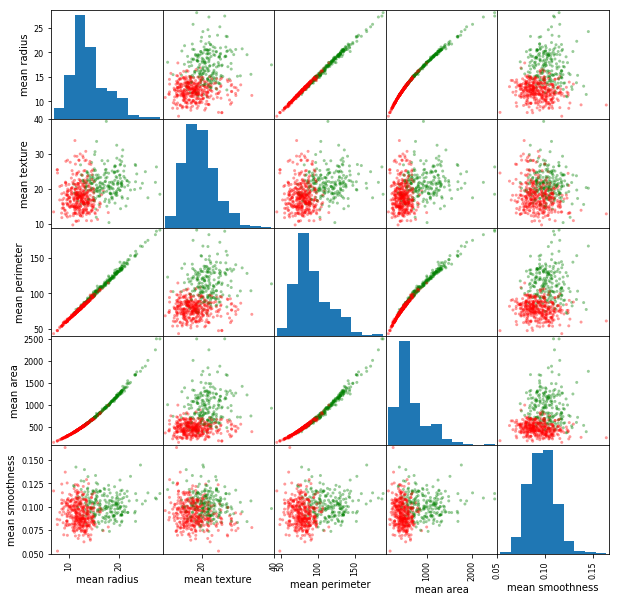

In [8]:
colors = np.array(['r'] * y.size)
colors[y == 0] = 'g'
sm = pd.scatter_matrix(df.iloc[:, :5], c=colors, alpha=0.4, figsize=((10,10)));
plt.show()

<b>Comment:</b> The best kernel turned out to be the 'rbf' kernel. The reason is that our data is normally distributed as we can see for some features from the plots above.<br>
<b>Answer (1a):</b> For this dataset accuracy score will be OK, as there is no big imbalance in classes. Moreover, as class 1 is more than class 0, we can reliably use AUC-ROC

b. [25 pts]

Using random search, what are the optimum hyperparameters for each kernel? 
For this question use, only a few numbers of iterations when you do a random search (no need to run for long hours) also be smart when you select the scale for the C, gamma and class_weight thus you can find the best params. Which SVM kernel achieving the highest performance?

Note: You can use RandomizedSearchCV function from the scikit learn library.

In [9]:
from sklearn.model_selection import RandomizedSearchCV

In [10]:
params = {'C': scipy.stats.expon(scale=100),
          'gamma': scipy.stats.expon(scale=.1),
          'class_weight': ['balanced', None]}
rcvs = {}
for kernel in kernels:
    print('{} kernel'.format(kernel))
    rcv = RandomizedSearchCV(SVC(kernel=kernel), params, cv=50, n_iter=100, scoring='roc_auc', n_jobs=-1, verbose=1)
    rcv.fit(X, y)
    rcvs[kernel] = rcv

linear kernel
Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 2636 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 4433 tasks      | elapsed:   52.2s


poly kernel
Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   58.9s finished
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    7.7s finished


rbf kernel
Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed:   10.3s


sigmoid kernel
Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    7.5s finished


<b>Answer (1b):</b> The best pararmeters are shown below. (We can ignore gamma for linear kernel)

In [11]:
for kernel in kernels:
    print(kernel, rcvs[kernel].best_params_, rcvs[kernel].best_score_)

linear {'C': 9.861410245881366, 'class_weight': None, 'gamma': 0.1612546921862739} 0.9951920662816972
poly {'C': 50.5900540126629, 'class_weight': 'balanced', 'gamma': 0.01797677028808053} 0.9966670851117247
rbf {'C': 263.3845639936361, 'class_weight': None, 'gamma': 0.0038319490155741976} 0.9973575194576952
sigmoid {'C': 84.06759309016317, 'class_weight': None, 'gamma': 0.0022084424975238486} 0.9965478282701482


<b>Answer (1b):</b> The best score is shown by rbf kernel. The worst is the linear kernel. It is even the worst in terms of fitting time.

c. (Graduate students only) [20 pts]

Randomly select 20% of the data for testing and the rest for training.

Plot the decision surface for "worse SVM", "best SVM" found in part b and report the performance for each, you may use built-in sklean functions for visualization.

Note: For visualization you need to work on two-dimensional feature space, to do so use PCA to reduce the number of the feature to 2 features. 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
pca = PCA(n_components=2).fit(X)

In [15]:
def plot_decision_boundary(X_ld, y_true, label, xlabel, ylabel, clf, title_suf='', show=True, N=120):
    e = []
    for i in range(X_ld.shape[1]):
        e += [np.linspace(X_ld[:, i].min(), X_ld[:, i].max(), N)]
    e = np.meshgrid(*e)

    X_mg = np.array([t.ravel() for t in e]).T
    
    ys = clf.predict(X_mg)

    if show:
        plt.figure(figsize=(10, 10))
    plt.scatter(X_mg[ys == 1, 0], X_mg[ys == 1, 1], s=20, marker='s')
    plt.scatter(X_mg[ys == 0, 0], X_mg[ys == 0, 1], s=20, marker='s')
    plt.scatter(X_ld[y_true == 0, 0], X_ld[y_true == 0, 1], c='#ff7f0e', marker='o', s=50, linewidths=1, edgecolors='k', label='Not ' + label.lower())
    plt.scatter(X_ld[y_true == 1, 0], X_ld[y_true == 1, 1], c='#1f77b4', marker='o', s=50, linewidths=1, edgecolors='k', label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best')
    plt.title('Decision boundary. Circles are true values' + title_suf)
    if show:
        plt.show()

In [16]:
X_train_ld = pca.transform(X_train)  # ld - lower dimension
X_test_ld = pca.transform(X_test)

It is hard to do meshgrid on 30d space (It needs range(feature)^30 bytes of memory which is really huge), so we train our SVMs on 2d data

In [17]:
svm_best = SVC(**rcvs['rbf'].best_params_).fit(X_train_ld, y_train)
svm_worst = SVC(**rcvs['linear'].best_params_).fit(X_train_ld, y_train)

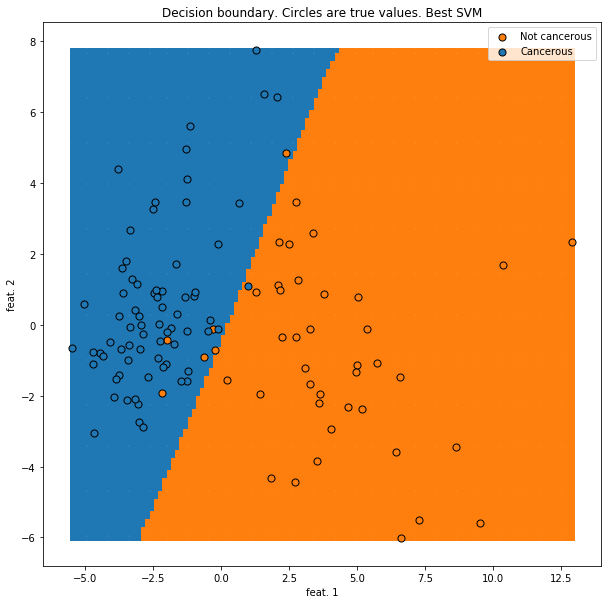

In [18]:
plot_decision_boundary(X_test_ld, y_test, 'Cancerous', 'feat. 1', 'feat. 2', svm_best, '. Best SVM')

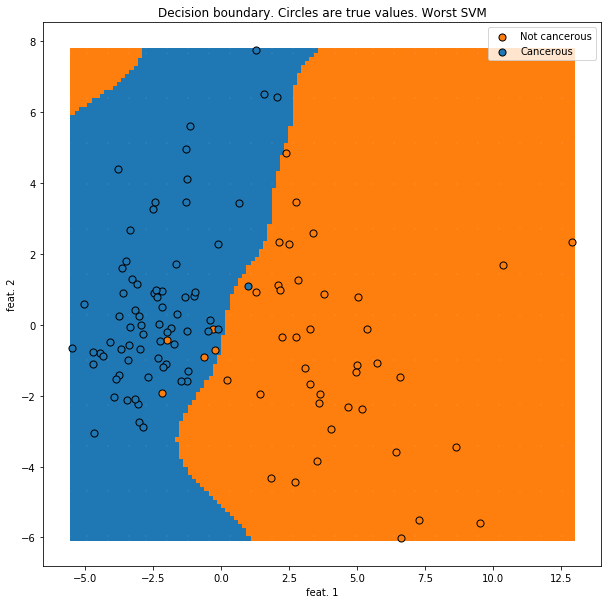

In [19]:
plot_decision_boundary(X_test_ld, y_test, 'Cancerous', 'feat. 1', 'feat. 2', svm_worst, '. Worst SVM')

# Assignment 3 -- Part 2

In this part, you will use the decision tree from sklearn to classify non-linearly separable datasets. 


Load Car Evaluation Data Set from https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data, read the dataset description and get familiar with the dataset attributes https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

This dataset includes strings, you might need to convert them to numbers, in this case, you might need to use methods such as preprocessing.LabelEncoder() 


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
enc = LabelEncoder()

In [22]:
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [23]:
df2 = pd.read_csv('data/car.data', header=None, names=feature_names + ['target'])

In [24]:
df2.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [25]:
for col in df2.columns:
    df2[col] = enc.fit_transform(df2[col])

In [26]:
df2.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [27]:
X2, y2 = df2[feature_names].values, df2['target'].values

a. [20 pts]

Use the decision tree to classify the dataset (evaluate cars to one of the four classes unacc, acc, good, v-good), use cross-validation to report your results, you can use sklearn.tree.DecisionTreeClassifier.


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [29]:
cv = cross_validate(DecisionTreeClassifier(), X2, y2, cv=50, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [30]:
cv['test_score'].mean(), cv['test_score'].std()

(0.979652030181442, 0.027725359465940784)

<b>Answer (2a): </b> When using 50 folds, accuracy is 98% on validation data with the std of 2.7%

b. [20 pts]

What is the optimum min_samples_split (The minimum number of samples required to split an internal node), does it make sense? Why?




In [31]:
# As we Dec. Tree fits very fast, we can use GridSearch instead of RandomSearch
gcv = GridSearchCV(
    DecisionTreeClassifier(),
    {'min_samples_split': np.arange(2, 20)},
    cv=50,
    n_jobs=-1, verbose=1
)

In [32]:
gcv.fit(X2, y2)

Fitting 50 folds for each of 18 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    0.6s finished


GridSearchCV(cv=50, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [33]:
gcv.best_params_, gcv.best_score_

({'min_samples_split': 2}, 0.9797453703703703)

<b>Answer (2b):</b> min_samples_split is 2. It makes sense, as when splitted, there is only 1 object in a leaf, thus it increases the gain. But the problem here is overfitting. As we used cv=50, in training data we had some information about testing data; but if we set cv=5, then accuracy score would be 0.778, which tells us about overfitting

c. (Graduate students only) [25 pts]

Implement random forest classifier by defining multiple (DecisionTreeClassifier)'s from sklearn, you can use the max_features from DecisionTreeClassifier, compare your results to RandomForestClassifier from sklearn.

Note: In this part implement the bagging/ensemble by yourself without calling built-in functions from sklearn (you may still use RandomForestClassifier from sklearn with max_features).


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
class RandomForest:
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.estimators = []
        
    def fit(self, X, y):
        n, m = X.shape
        for i in range(self.n_estimators):
            dt = DecisionTreeClassifier(max_features='auto')
            indices = np.random.randint(0, n, size=n)
            self.estimators += [dt.fit(X[indices], y[indices])]

        return self

    def predict(self, X):
        y_preds = []
        for est in self.estimators:
            y_preds += [est.predict(X)]

        y_preds = np.array(y_preds)

        y_pred = []
        for i in range(X.shape[0]):
            un, cnts = np.unique(y_preds[:, i], return_counts=True)
            y_pred += [un[np.argmax(cnts)]]

        return np.array(y_pred)

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2)

In [38]:
rf_custom = RandomForest().fit(X_train2, y_train2)

In [39]:
y_pred_c = rf_custom.predict(X_test2)
accuracy_score(y_test2, y_pred_c)

0.9653179190751445

In [40]:
rf = RandomForestClassifier().fit(X_train2, y_train2)

In [41]:
y_pred = rf.predict(X_test2)
accuracy_score(y_test2, y_pred)

0.9479768786127167

In [42]:
dt = DecisionTreeClassifier().fit(X_train2, y_train2)

In [43]:
y_pred_dt = dt.predict(X_test2)
accuracy_score(y_test2, y_pred_dt)

0.9710982658959537

<b>Answer (2c):</b> The results of my implementation of RF and sklearn's RF are close. The difference could be in the randomness and implementation of sklearn's RF. And it is very interesting, that DT performs better than RF